# Ecommerce B2B project

###  Import all the relevant packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data into pandas dataframe 

In [2]:
df=pd.read_csv("bi_project_2.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Check columns

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.shape

(541909, 8)

### Check for missing values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


###  Convert the records under the column "Description" into string title format

In [9]:
df['Description'] = df['Description'].str.title()

### Change the format of "InvoiceDate" as datetime

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###  Create four columns on the basis of "InvoiceDate" 

In [12]:
df['Hour']=df['InvoiceDate'].dt.strftime('%d %H:%M')
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['MonthYear'] = df['InvoiceDate'].dt.strftime('%B-%Y')

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Day,Month,MonthYear
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01 08:26,Wednesday,December,December-2010
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01 08:26,Wednesday,December,December-2010
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01 08:26,Wednesday,December,December-2010
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01 08:26,Wednesday,December,December-2010
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01 08:26,Wednesday,December,December-2010


### filtering rows with any missing value

In [14]:
missing_dataset= df[df.isna().any(axis=1)]

In [15]:
missing_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Day,Month,MonthYear
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,01 11:52,Wednesday,December,December-2010
1443,536544,21773,Decorative Rose Bathroom Bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,01 14:32,Wednesday,December,December-2010
1444,536544,21774,Decorative Cats Bathroom Bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,01 14:32,Wednesday,December,December-2010
1445,536544,21786,Polkadot Rain Hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,01 14:32,Wednesday,December,December-2010
1446,536544,21787,Rain Poncho Retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,01 14:32,Wednesday,December,December-2010


In [16]:
# convert InvoiceDate column to datetime format
missing_dataset['InvoiceDate'] = pd.to_datetime(missing_dataset['InvoiceDate'], format='%m/%d/%Y %H:%M')

# add DayMonthYear column to missing_dataset
missing_dataset['DayMonthYear'] = missing_dataset['InvoiceDate'].dt.strftime('%a-%b-%y')


C:\Users\Dell\AppData\Local\Temp\ipykernel_14952\1550363581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_dataset['InvoiceDate'] = pd.to_datetime(missing_dataset['InvoiceDate'], format='%m/%d/%Y %H:%M')
C:\Users\Dell\AppData\Local\Temp\ipykernel_14952\1550363581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_dataset['DayMonthYear'] = missing_dataset['InvoiceDate'].dt.strftime('%a-%b-%y')


In [17]:
missing_dataset.shape

(135080, 13)

### crete missing group 1

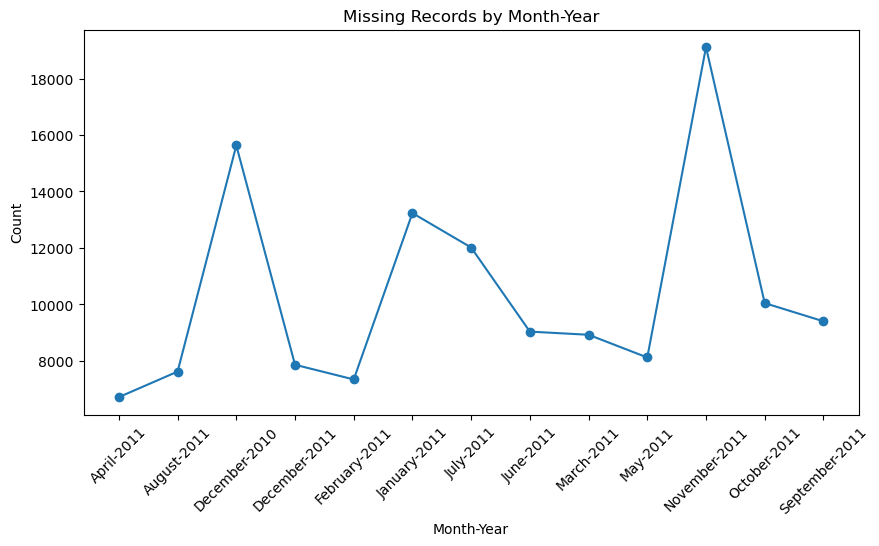

In [18]:
missing_group_1 = missing_dataset.groupby(missing_dataset['MonthYear'])['InvoiceNo'].agg('count').reset_index()
missing_group_1.columns = ['MonthYear', 'Count']

# plot missing_group_1
plt.figure(figsize=(10, 5))
plt.plot(missing_group_1['MonthYear'], missing_group_1['Count'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Missing Records by Month-Year')
plt.show()

In [19]:
# Create DayMonthYear column
df['DayMonthYear'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Group by DayMonthYear
missing_group_2 = df.groupby('DayMonthYear')['DayMonthYear'].count()

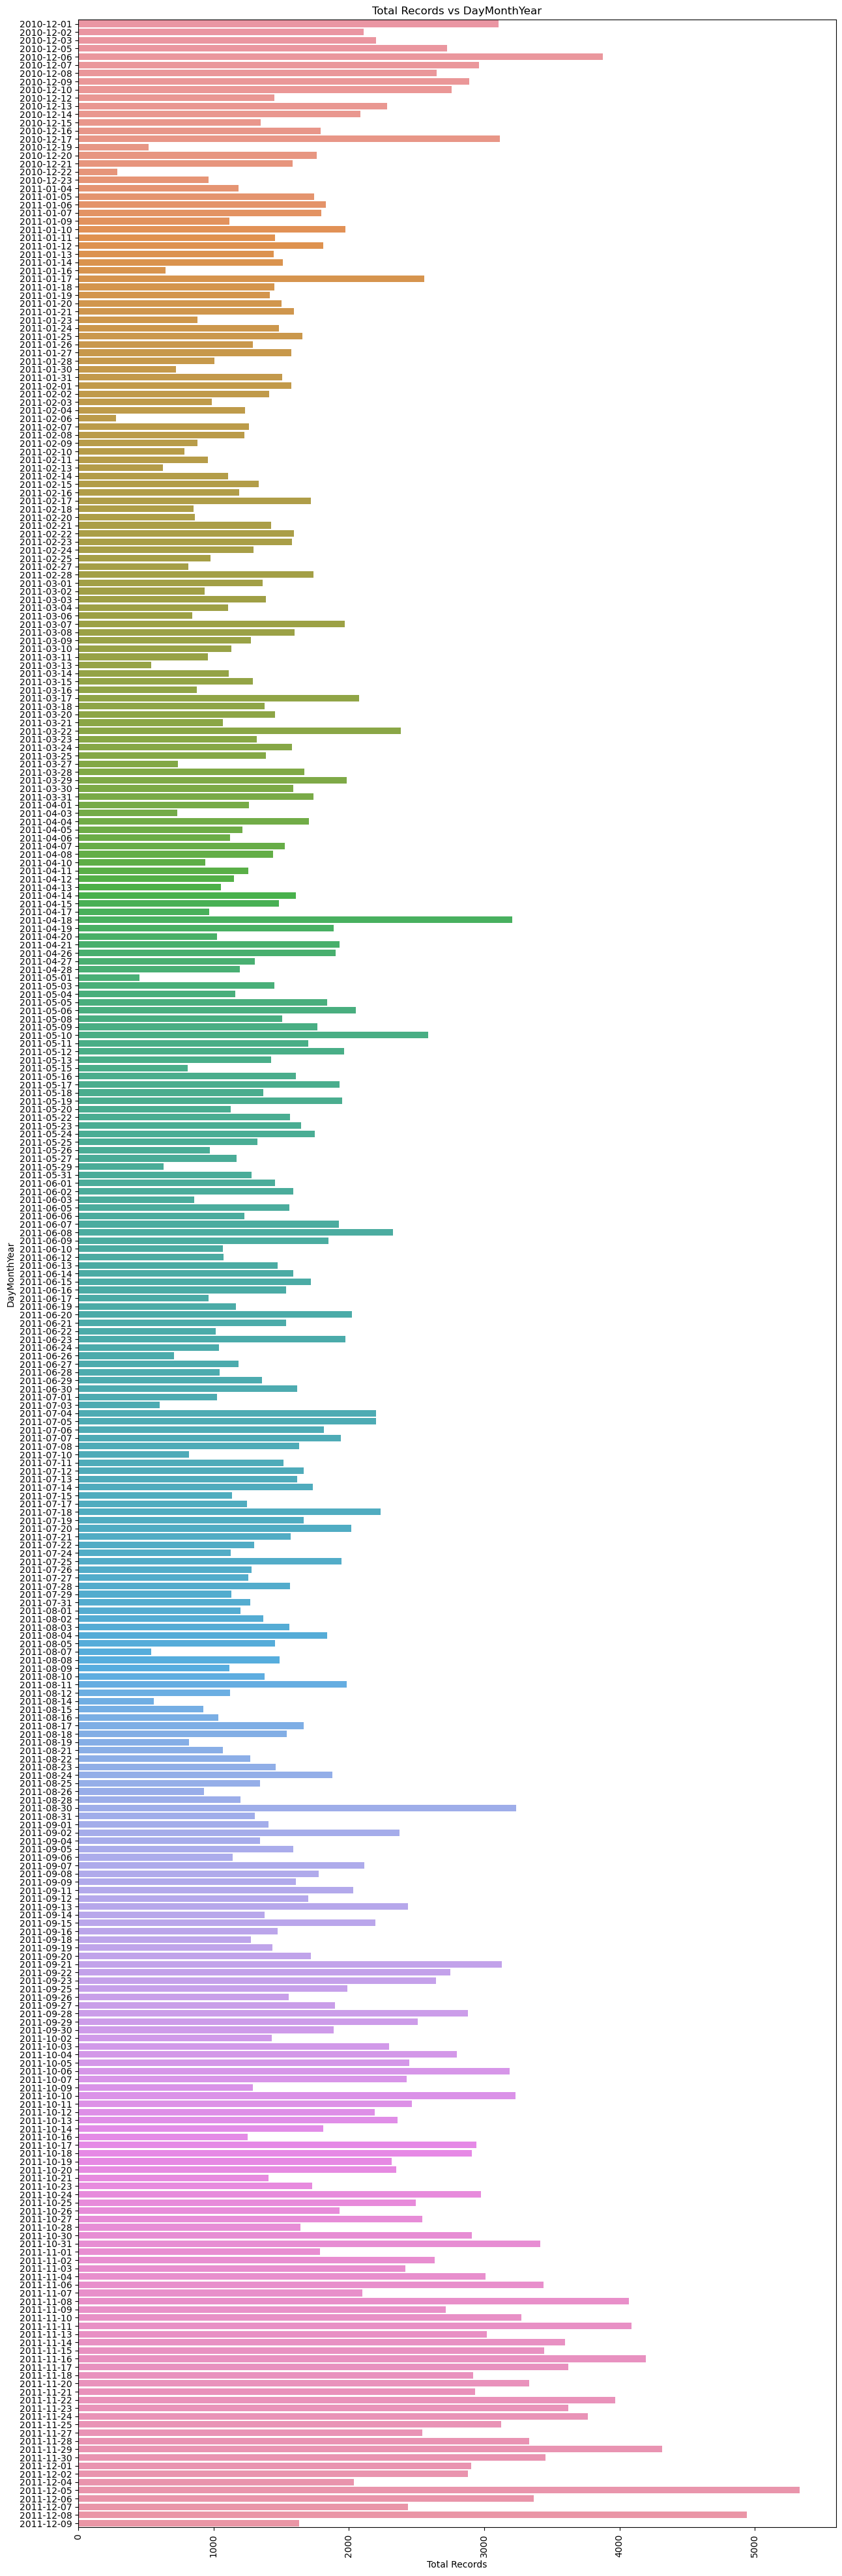

In [20]:
# Create a bar plot
plt.figure(figsize=(15,50))
sns.barplot(x=missing_group_2.values,y=missing_group_2.index)
plt.title('Total Records vs DayMonthYear')
plt.xlabel('Total Records')
plt.ylabel('DayMonthYear')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Create cancelled_orders dataframe
cancelled_orders = df[df['InvoiceNo'].str.startswith('C', na=False)]

In [22]:
# Create cancelled_orders_discounts dataframe
cancelled_orders_discounts = cancelled_orders[cancelled_orders['StockCode'] == 'D']

In [23]:
# Create AmountSpent field
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']

In [24]:
# Remove missing records
df.dropna(inplace=True)

In [25]:
# Drop records with negative quantity
df = df[df['Quantity'] > 0]

In [26]:
# Create AmountSpent field
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']

In [27]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [28]:
# Convert CustomerID to int64
df['CustomerID'] = df['CustomerID'].astype('int64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  int64         
 7   Country       397884 non-null  object        
 8   Hour          397884 non-null  object        
 9   Day           397884 non-null  object        
 10  Month         397884 non-null  object        
 11  MonthYear     397884 non-null  object        
 12  DayMonthYear  397884 non-null  object        
 13  AmountSpent   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 

In [30]:
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [31]:
df["InvoiceNo"]=df["InvoiceNo"].astype(int)

In [32]:
df.to_csv('bi_project_22.csv', index=False)

In [33]:
df.drop('InvoiceDate',axis=1,inplace=True)

In [34]:
df1=df
df1.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour,Day,Month,MonthYear,DayMonthYear,AmountSpent
count,397884.000000,397884,397884,397884.000000,397884.000000,397884.000000,397884,397884,397884,397884,397884,397884,397884.000000
unique,NaN,3665,3877,NaN,NaN,NaN,37,11054,6,12,13,305,NaN
top,NaN,85123A,White Hanging Heart T-Light Holder,NaN,NaN,NaN,United Kingdom,23 13:39,Thursday,November,November-2011,2011-11-06,NaN
freq,NaN,2035,2028,NaN,NaN,NaN,354321,549,80035,64531,64531,3423,NaN
mean,560616.934451,NaN,NaN,12.988238,3.116488,15294.423453,NaN,NaN,NaN,NaN,NaN,NaN,22.397000
std,13106.117773,NaN,NaN,179.331775,22.097877,1713.141560,NaN,NaN,NaN,NaN,NaN,NaN,309.071041
min,536365.000000,NaN,NaN,1.000000,0.001000,12346.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.001000
25%,549234.000000,NaN,NaN,2.000000,1.250000,13969.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.680000
50%,561893.000000,NaN,NaN,6.000000,1.950000,15159.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.800000
75%,572090.000000,NaN,NaN,12.000000,3.750000,16795.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.800000


### Removing outliers 

In [35]:
q1=2
q3=12
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 * iqr
lower_limit
upper_limit
df2=df1[(df1.Quantity<upper_limit) & (df1.Quantity>lower_limit)]

In [36]:
q1=1.250000
q3=3.750000
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 * iqr
lower_limit
upper_limit
df3=df2[(df1.UnitPrice<upper_limit) & (df2.UnitPrice>lower_limit)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_14952\4001429686.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[(df1.UnitPrice<upper_limit) & (df2.UnitPrice>lower_limit)]


In [37]:
df2.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour,Day,Month,MonthYear,DayMonthYear,AmountSpent
count,372190.000000,372190,372190,372190.000000,372190.000000,372190.000000,372190,372190,372190,372190,372190,372190,372190.000000
unique,NaN,3647,3853,NaN,NaN,NaN,37,10639,6,12,13,305,NaN
top,NaN,85123A,White Hanging Heart T-Light Holder,NaN,NaN,NaN,United Kingdom,23 13:39,Thursday,November,November-2011,2011-11-06,NaN
freq,NaN,1686,1680,NaN,NaN,NaN,334026,539,74058,61058,61058,3327,NaN
mean,560659.220629,NaN,NaN,7.027459,3.228682,15309.590365,NaN,NaN,NaN,NaN,NaN,NaN,14.364894
std,13129.096893,NaN,NaN,6.658201,22.815667,1711.591620,NaN,NaN,NaN,NaN,NaN,NaN,28.059878
min,536365.000000,NaN,NaN,1.000000,0.001000,12347.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.001000
25%,549238.000000,NaN,NaN,2.000000,1.250000,13985.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.200000
50%,561907.000000,NaN,NaN,4.000000,1.950000,15194.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.200000
75%,572203.000000,NaN,NaN,12.000000,3.750000,16813.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.700000


In [38]:
q1=3.750000
q3=17.400000
iqr=q3-q1
lower_limit=q1 - 1.5 * iqr
upper_limit=q3 + 1.5 * iqr
lower_limit
upper_limit
df4=df3[(df1.AmountSpent<upper_limit) & (df3.AmountSpent>lower_limit)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_14952\3306835285.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4=df3[(df1.AmountSpent<upper_limit) & (df3.AmountSpent>lower_limit)]


In [39]:
df4.shape

(324227, 13)

In [40]:
dff=df4

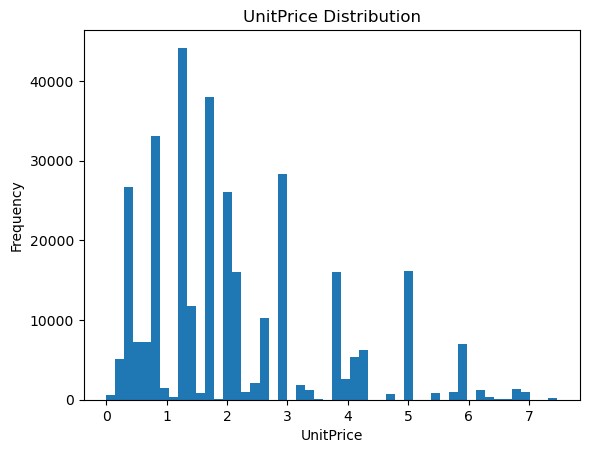

In [41]:
# Create a histogram of the UnitPrice column
plt.hist(df4['UnitPrice'], bins=50)
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

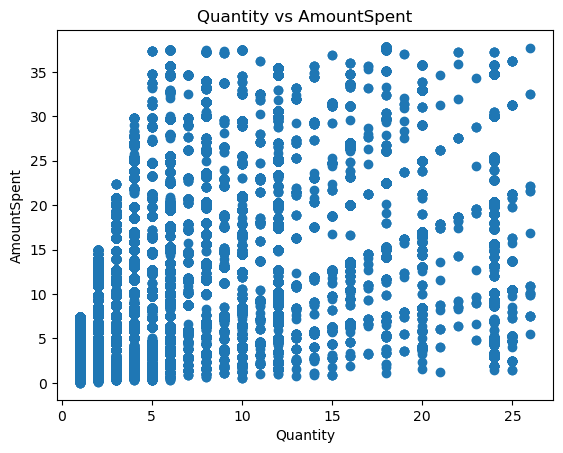

In [42]:
plt.scatter(df4['Quantity'], df4['AmountSpent'])
plt.title('Quantity vs AmountSpent')
plt.xlabel('Quantity')
plt.ylabel('AmountSpent')
plt.show()

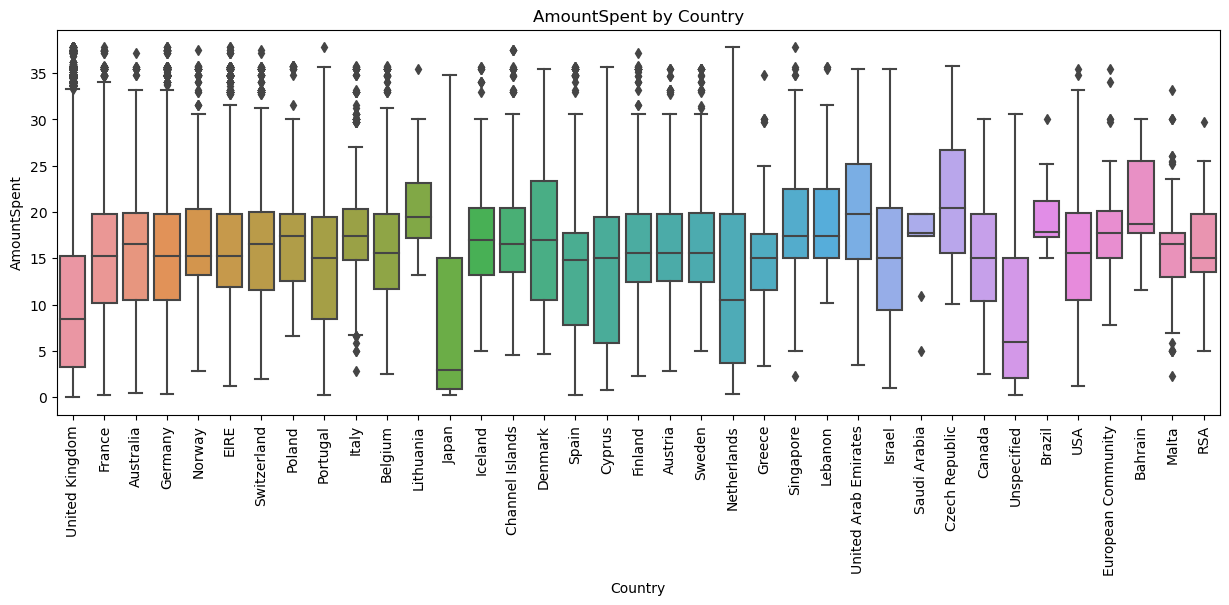

In [43]:
# Create a box plot of AmountSpent by Country
plt.figure(figsize=(15,5))
sns.boxplot(x=df4['Country'], y=df4['AmountSpent'])
plt.title('AmountSpent by Country')
plt.xlabel('Country')
plt.ylabel('AmountSpent')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Number of Transactions')

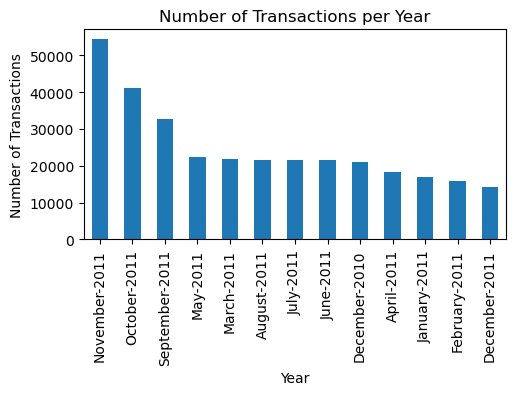

In [44]:
# Univariate Analysis
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
df4['MonthYear'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')

Text(0, 0.5, 'Number of Transactions')

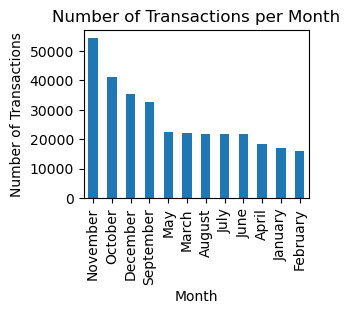

In [45]:
plt.subplot(2, 2, 2)
df4['Month'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

Text(0, 0.5, 'Number of Transactions')

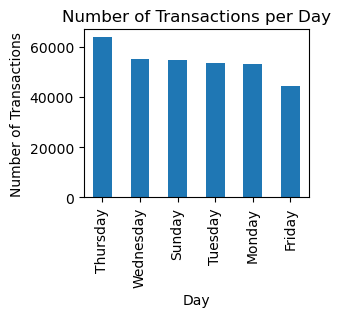

In [46]:
plt.subplot(2, 2, 3)
df4['Day'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per Day')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')

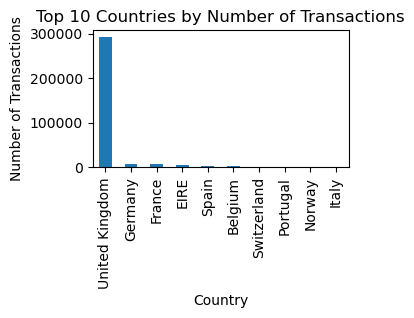

In [47]:
plt.subplot(2, 2, 4)
df4['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.tight_layout()

Text(0, 0.5, 'Frequency')

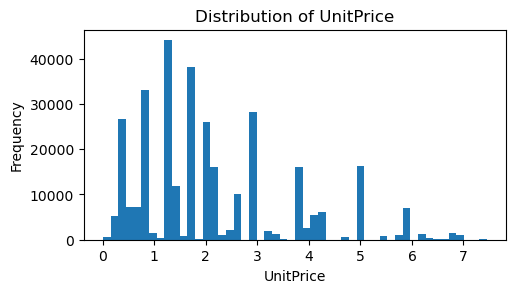

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
df4['UnitPrice'].plot(kind='hist', bins=50)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

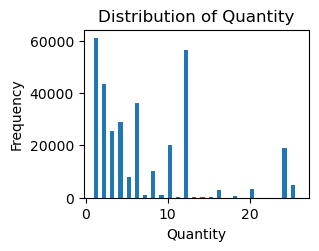

In [49]:

plt.subplot(2, 2, 2)
df4['Quantity'].plot(kind='hist', bins=50)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

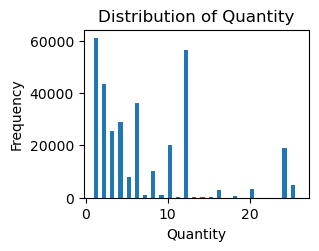

In [50]:

plt.subplot(2, 2, 2)
df4['Quantity'].plot(kind='hist', bins=50)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

### univariate analysis


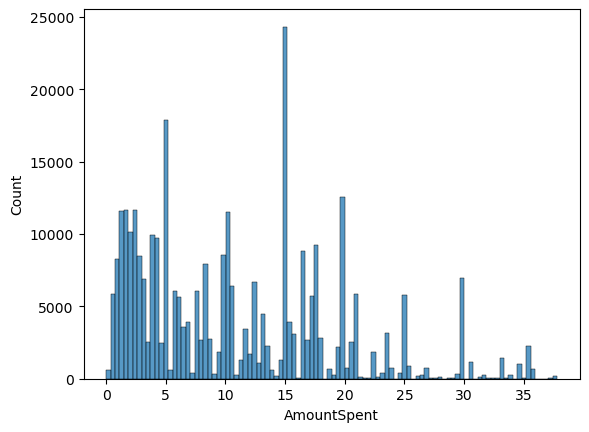

In [51]:
# Distribution of TotalCost variable
sns.histplot(df4["AmountSpent"], kde=False)
plt.show()

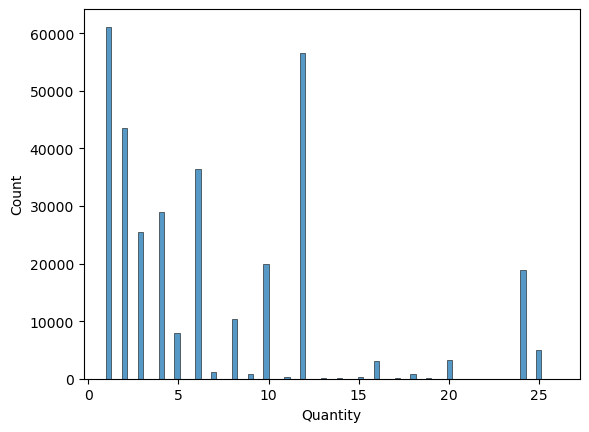

In [52]:
# Distribution of Quantity variable
sns.histplot(df4["Quantity"], kde=False)
plt.show()

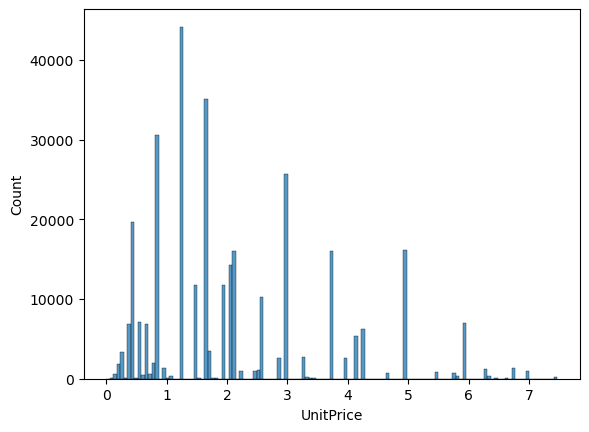

In [53]:
# Distribution of UnitPrice variable
sns.histplot(df4["UnitPrice"], kde=False)
plt.show()

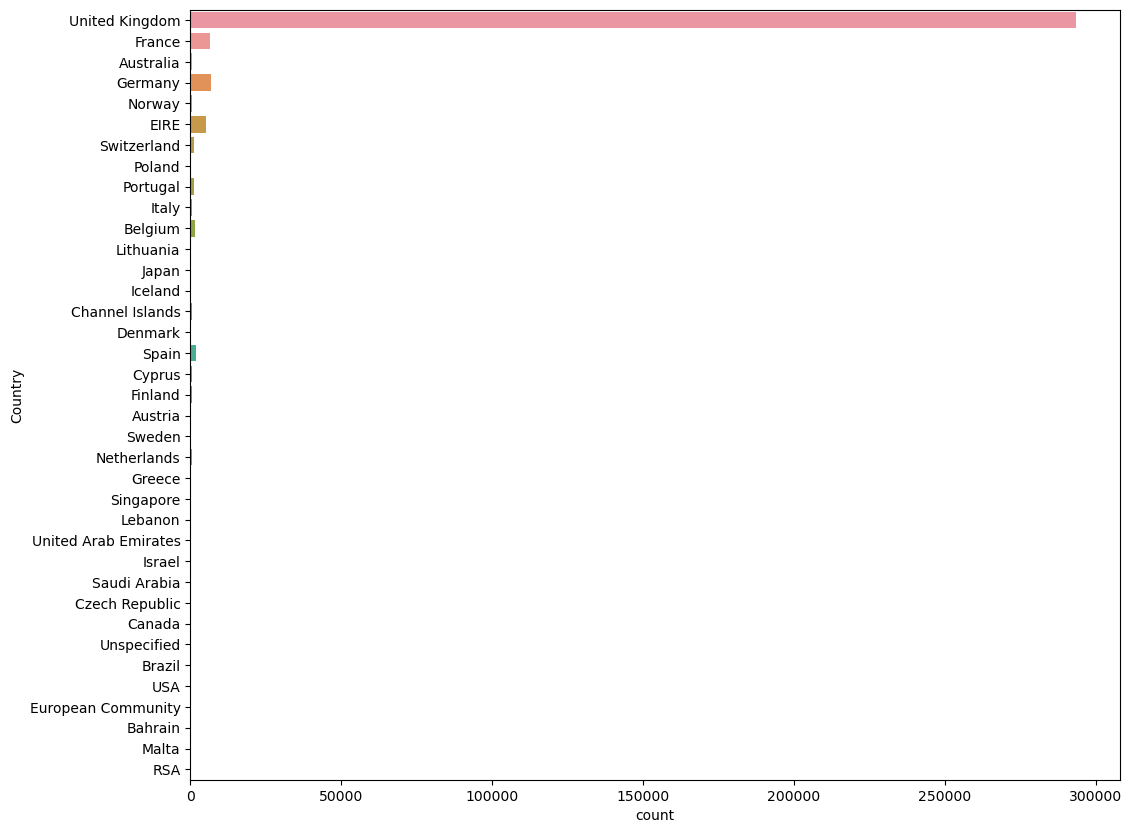

In [54]:
# Distribution of Country variable
plt.figure(figsize=(12,10))
sns.countplot(y=df4["Country"])
plt.show()

### bivariate analysis

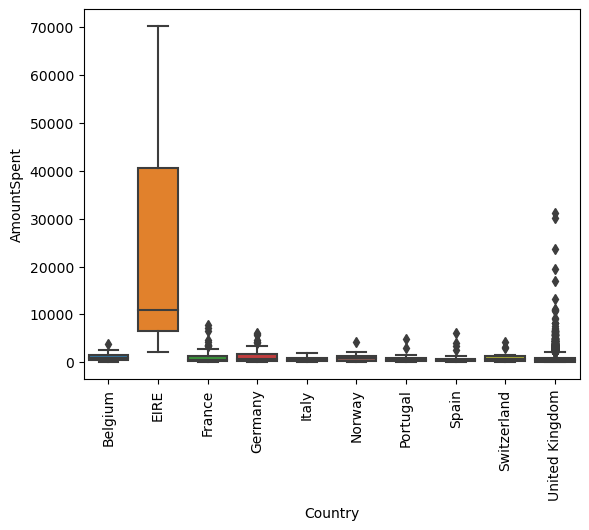

In [55]:
# Group the data by Country and CustomerID and calculate the total revenue for each customer in each country
revenue_by_customer = df4.groupby(["Country", "CustomerID"])["AmountSpent"].sum().reset_index()

# Plot the total revenue for each customer in the top 10 countries with the most customers
top_countries = df4["Country"].value_counts().head(10).index
sns.boxplot(x="Country", y="AmountSpent", data=revenue_by_customer[revenue_by_customer["Country"].isin(top_countries)])
plt.xticks(rotation=90)
plt.show()

### multivariate analysis 

C:\Users\Dell\AppData\Local\Temp\ipykernel_14952\2073103715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["TransactionMonth"] = df4["DayMonthYear"]


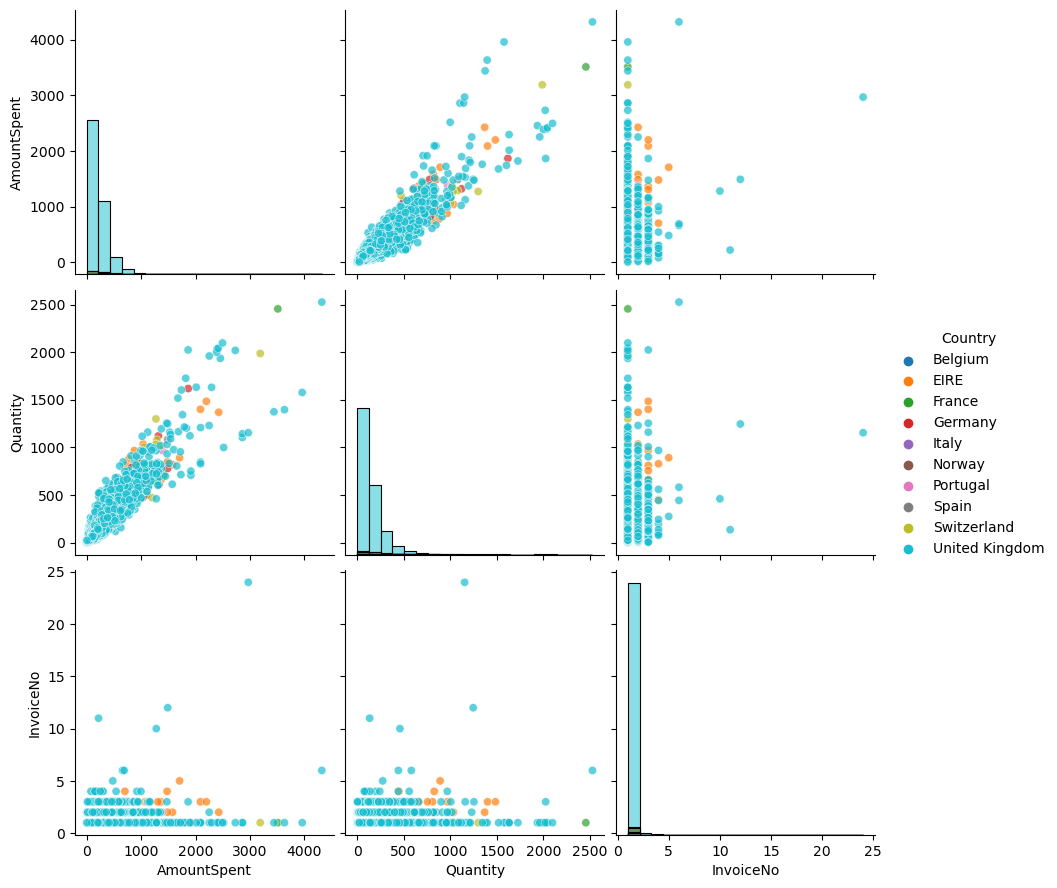

In [56]:
# Group the data by Country, CustomerID and month of transaction and calculate the total revenue, quantity and number of transactions for each customer
df4["TransactionMonth"] = df4["DayMonthYear"]
customer_summary = df4.groupby(["Country", "CustomerID", "TransactionMonth"]).agg({
    "AmountSpent": "sum",
    "Quantity": "sum",
    "InvoiceNo": "nunique"
}).reset_index()

# Plot the total revenue, quantity and number of transactions for each customer in the top 10 countries with the most customers
sns.pairplot(data=customer_summary[customer_summary["Country"].isin(top_countries)], 
             vars=["AmountSpent", "Quantity", "InvoiceNo"], 
             hue="Country",
             diag_kind="hist",
             diag_kws={"bins": 20},
             plot_kws={"alpha": 0.7},
             height=3)
plt.show()

### check distribution of variable 

In [57]:
# correlation matrix between numerical variables
corr = df4[["AmountSpent", "Quantity", "UnitPrice"]].corr()

In [58]:
corr

,AmountSpent,Quantity,UnitPrice
AmountSpent,1.000000,0.511656,0.283729
Quantity,0.511656,1.000000,-0.427872
UnitPrice,0.283729,-0.427872,1.000000


In [59]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324227 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         324227 non-null  int32  
 1   StockCode         324227 non-null  object 
 2   Description       324227 non-null  object 
 3   Quantity          324227 non-null  int64  
 4   UnitPrice         324227 non-null  float64
 5   CustomerID        324227 non-null  int64  
 6   Country           324227 non-null  object 
 7   Hour              324227 non-null  object 
 8   Day               324227 non-null  object 
 9   Month             324227 non-null  object 
 10  MonthYear         324227 non-null  object 
 11  DayMonthYear      324227 non-null  object 
 12  AmountSpent       324227 non-null  float64
 13  TransactionMonth  324227 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(9)
memory usage: 35.9+ MB


In [60]:
df4.shape

(324227, 14)

In [61]:
df4.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Hour', 'Day', 'Month', 'MonthYear',
       'DayMonthYear', 'AmountSpent', 'TransactionMonth'],
      dtype='object')